In [3]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2

import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [4]:
Image_size = [244,244]

In [5]:
from keras.applications.vgg16 import VGG16

vgg = VGG16(include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",)

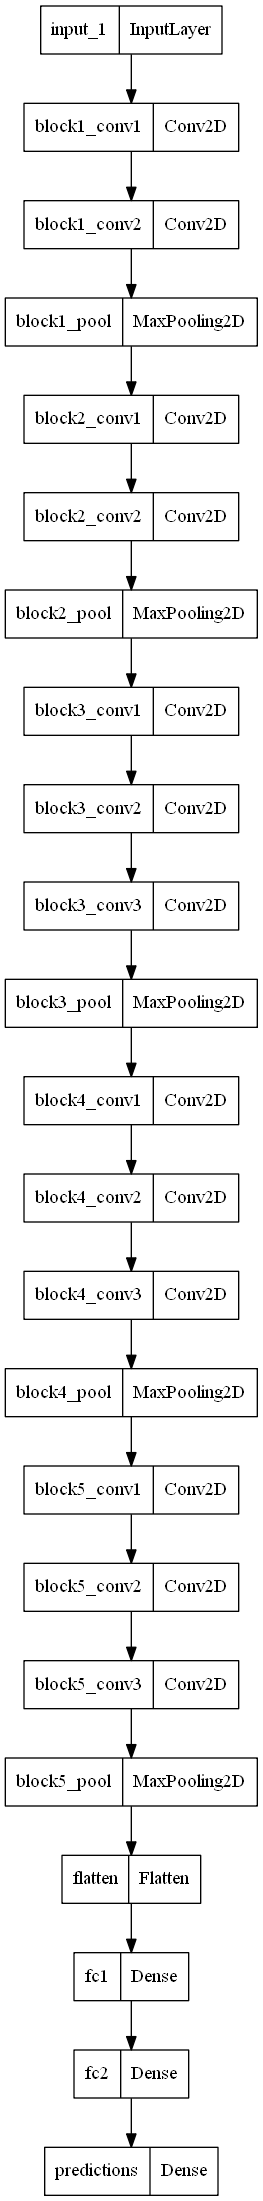

In [6]:
from tensorflow.keras.utils import plot_model

plot_model(vgg,to_file="vgg_model.png",show_shapes =False)

In [18]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
from keras.preprocessing import image

train_datagen = image.ImageDataGenerator(
                rescale = 1./255,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True
                )
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
                    'Dataset/Train',
                    target_size = (244,244),
                    batch_size = 32,
                    class_mode = 'binary'
)

Found 392 images belonging to 2 classes.


In [22]:
test_generator = test_dataset.flow_from_directory(
                    'chest_xray/test',
                    target_size = (244,244),
                    batch_size = 32,
                    class_mode = 'binary'
)


Found 624 images belonging to 2 classes.


In [24]:
vgg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
hist = vgg.fit_generator(
        train_generator,
        steps_per_epoch = 8,
        epochs = 10,
        validation_data = test_generator,
        validation_steps = 2
)

<ipython-input-25-fc5f4c974193>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = vgg.fit_generator(


Epoch 1/10
8/8 [==============================] - 455s 53s/step - loss: 78.8614 - accuracy: 0.4297 - val_loss: 65.0472 - val_accuracy: 0.3750
Epoch 2/10
8/8 [==============================] - 366s 46s/step - loss: 8.6928 - accuracy: 0.5216 - val_loss: 0.7464 - val_accuracy: 0.6094
Epoch 3/10
8/8 [==============================] - 417s 52s/step - loss: 1.2977 - accuracy: 0.4609 - val_loss: 1.0557 - val_accuracy: 0.6250
Epoch 4/10
8/8 [==============================] - 431s 53s/step - loss: 0.7757 - accuracy: 0.5273 - val_loss: 20.8521 - val_accuracy: 0.6562
Epoch 5/10
8/8 [==============================] - 399s 48s/step - loss: 5.4516 - accuracy: 0.4612 - val_loss: 2.5946 - val_accuracy: 0.4062
Epoch 6/10
8/8 [==============================] - 437s 54s/step - loss: 1.3388 - accuracy: 0.5234 - val_loss: 1.0315 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 390s 49s/step - loss: 0.8599 - accuracy: 0.4727 - val_loss: 1.2103 - val_accuracy: 0.6094
Epoch 8/10
8/8 [=